In [12]:
import math
import matplotlib.pyplot as plt
import pymg

dep = 19
N = 2 ** dep
x0 = -1
x1 = 1
dx = (x1 - x0) / N
x = [x0 + i * dx for i in range(N + 1)]
u0 = u1 = 1
u = [u0 + dx * i * (u1 - u0) / (x1 - x0) for i in range(N + 1)]
g = [i ** 6 + 3 * i ** 2 for i in x]
u_sol = [math.exp((x[i] ** 4 - 1) / 4) for i in range(N + 1)]

In [13]:
def nonlin_iter():
    residual = [0] * (N + 1)
    for i in range(1, N):
        residual[i] = g[i] * u[i] ** 2 - (u[i + 1] + u[i - 1] - 2 * u[i]) / dx / dx
    mg = pymg.Multigrid(dep, 1, x0, x1, 0, 0, residual)
    delta_u = mg.solve()
    for i in range(1, N):
        u[i] += delta_u[i]
    return pymg.norm2res(delta_u)


In [14]:
while 1:
    res = nonlin_iter()
    print(res)
    if res < 1E-8:
        break


0.22704344435929735
0.08263965937937216
0.02688586736739918
0.009007555373964256
0.002982215470444535
0.0009908607173958553
0.0003288044220619693
0.0001091433543606772
3.6225480541533465e-05
1.2024073093190927e-05
3.990555186620113e-06
1.3246253826784882e-06
4.3803312223413257e-07
1.3961040477306998e-07
3.84439524411321e-08
8.085842808760021e-09


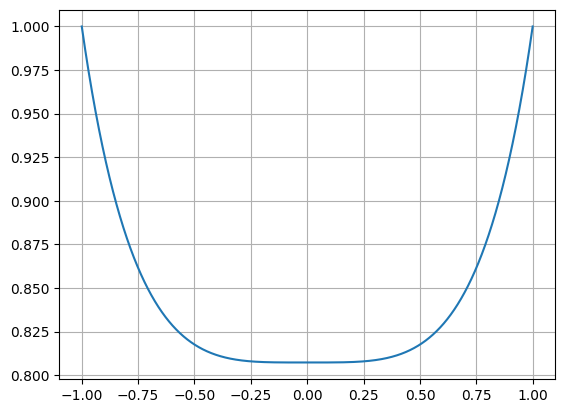

In [15]:
plt.plot(x, u)
plt.grid()

In [16]:
min(u)

0.8072798444051565